In [7]:
import numpy as np
import tensorflow as tf
print("Tensorflow version", tf.__version__)

Tensorflow version 2.1.0


In [15]:
from tensorflow import keras
print("Keras version", keras.__version__)

Keras version 2.2.4-tf


In [16]:
import matplotlib.pyplot as plt

In [17]:
# Setting the random seed for tf and np so as to reuse same 
# set of random variables and reproduce the results

np.random.seed(42) 
tf.random.set_seed(42)

Loading the Dataset 

In [26]:
fashion_mnist =keras.datasets.fashion_mnist

#Loading & sorting the data into train & test sets

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [27]:
X_train_full.shape

(60000, 28, 28)

The training set contains 60,000 grayscale images, each 28x28 pixels.

Splitting the Data 

In [37]:
# Slicing the first 5000 samples from the X_train_full 
#and dividing the values by 255. to scale the image pixel 
#values to be in the range 0-1. Storing these first 5000 
#scaled samples in X_valid

X_valid = X_train_full[:5000] / 255.

In [36]:
# Storing the remaining samples from 5000 of the 
#y_train_full to form the y_train

y_valid = y_train_full[:5000]

In [45]:
# Slicing the remaining samples from 5000 of the X_train_full
# and divide the values by 255. to scale the image pixel 
#values to be in the range 0-1. Storing these first 5000 
#scaled samples in X_train

X_train = X_train_full[5000:] / 255

In [44]:
# Storing the remaining samples from 5000 of the y_train_full
# to form the y_train

y_train = y_train_full[5000:]

In [46]:
print("Train data shape:",X_train.shape)
print("Validation data shape:",X_valid.shape)
print("Test data shape:",y_train.shape)

Train data shape: (55000, 28, 28)
Validation data shape: (5000, 28, 28)
Test data shape: (55000,)


In [47]:
# Scaling the values of X_test

X_test = X_test / 255

Visualizing the Data 

Note:

    plt.imshow(X, cmap="binary") displays X data as an image. cmap is used to map scalar data to colors. cmap=binary maps the image color to black and white format while displaying the image.

    plt.axis('off') is used to turn off the axes for subplots( you could remove this line and observe the difference for yourself).

    plt.subplot(a,b) is used to create a figure and a set of subplots with a rows and b columns.

    plt.subplots_adjust() is used to tune the subplot layout.


In [56]:
# Storing class name

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
       "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Class label is: 4
Class name is: Coat


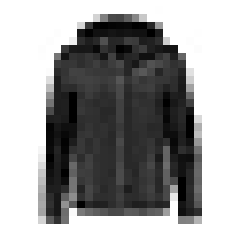

In [58]:
# Plotting an image with a 'binary' color map

print("Class label is:", y_train[0])
print("Class name is:", class_names[y_train[0]])
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

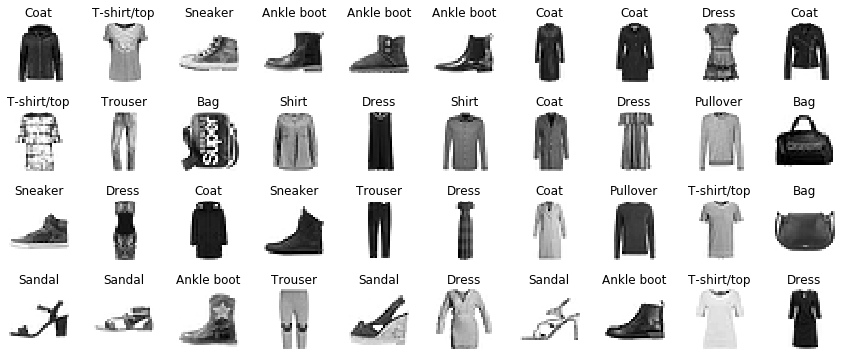

In [59]:
# Sample images in the dataset

n_rows = 4
n_cols = 10
plt.figure(figsize=(15, 6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index],cmap="binary")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


Building the Model

Note:

    keras.layers.Flatten : Flattens the input.

    keras.layers.Dense(300, activation="relu") : Just your regular densely-connected NN layer with 300 neurons and relu activation function.

    Why do we need clear_session?

    It is useful when you're creating multiple models in successions, such as during hyperparameter search or cross-validation. Each model you train adds nodes (potentially numbering in the thousands) to the graph. Eventually, models will become slower and slower to train, and you may also run out of memory. Clearing the session removes all the nodes left over from previous models, freeing memory and preventing slowdown.



In [62]:
# Clearing the session

keras.backend.clear_session()

In [63]:
# Building neural network

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [64]:
model.layers  #Viewing the layers of the Model

In [65]:
model.summary() # Viewing the summary of the Model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


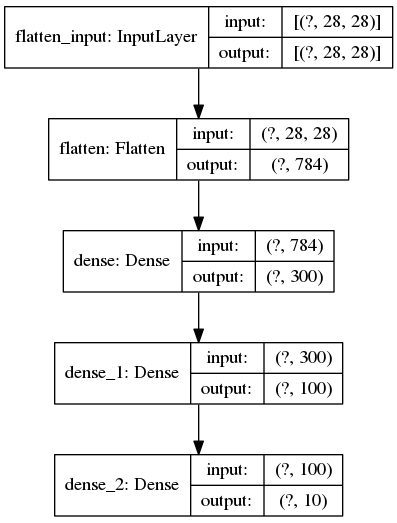

In [67]:
# Plotting the arcitecture of model and save it into 
# my_fashion_mnist_model.png file

keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [69]:
# Defining SGD Optimizer with LR 0.01

sgd = keras.optimizers.SGD(learning_rate=0.01)

In [70]:
model.compile(loss="sparse_categorical_crossentropy",
      optimizer=sgd,
      metrics=["accuracy"])

We have set accuracy as a performance evaluation metric. Also, we set sparse_categorical_crossentropy as the loss function, as we have the labels which are not one-hot vectors but the integers. 


Fitting the Model


Note:

    plt.gca() is used to get a reference to the current axes, if you need to change the limits on the y-axis, for example.



In [77]:
history = model.fit(X_train, y_train, epochs=30,
            validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 6s 112us/sample - loss: 0.7226 - accuracy: 0.7641 - val_loss: 0.5073 - val_accuracy: 0.8320
Epoch 2/30
55000/55000 [==============================] - 8s 147us/sample - loss: 0.4844 - accuracy: 0.8323 - val_loss: 0.4536 - val_accuracy: 0.8484
Epoch 3/30
55000/55000 [==============================] - 7s 132us/sample - loss: 0.4414 - accuracy: 0.8466 - val_loss: 0.4375 - val_accuracy: 0.8492
Epoch 4/30
55000/55000 [==============================] - 5s 96us/sample - loss: 0.4130 - accuracy: 0.8545 - val_loss: 0.4150 - val_accuracy: 0.8570
Epoch 5/30
55000/55000 [==============================] - 5s 98us/sample - loss: 0.3927 - accuracy: 0.8618 - val_loss: 0.3815 - val_accuracy: 0.8642
Epoch 6/30
55000/55000 [==============================] - 5s 96us/sample - loss: 0.3771 - accuracy: 0.8669 - val_loss: 0.3723 - val_accuracy: 0.8678
Epoch 7/30
55000/55000 [==============================

In [78]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [80]:
# Printing name of first hidden layer

hidden1 = model.layers[1]
print(hidden1.name)

dense


In [81]:
# To see the weights & biases of first hidden layer

weights, biases = hidden1.get_weights() # getting the weights and biases
print(weights.shape, weights)
print(biases)

(784, 300) [[ 0.0242747  -0.00885288 -0.02189048 ... -0.02773743  0.0385791
  -0.06889515]
 [ 0.00461253 -0.03110455 -0.0586676  ...  0.00594107 -0.02763803
  -0.04163249]
 [-0.06283453 -0.06918827  0.07103679 ... -0.04250751  0.07137369
  -0.0732349 ]
 ...
 [-0.01628507  0.02329763 -0.05394448 ...  0.00150965 -0.000846
   0.06348963]
 [ 0.0733345  -0.06968432  0.07041375 ... -0.00023423 -0.00219273
   0.03141041]
 [-0.06241024  0.01563262 -0.02585274 ... -0.0043491   0.0021283
  -0.06758426]]
[ 1.78749129e-01  4.48779278e-02 -1.46315934e-03 -8.98816064e-02
  8.96304380e-03  1.64549500e-01  3.22415940e-02 -5.96744474e-03
 -1.98446624e-02  4.17711549e-02 -3.09089497e-02 -3.94071117e-02
  1.05208956e-01  3.35411495e-03  1.69161484e-01  6.98798671e-02
 -3.64936106e-02  7.14635029e-02  6.75294846e-02 -1.33275568e-01
  8.29441249e-02  1.53317824e-01  1.91629287e-02  4.10086438e-02
  3.28414254e-02  9.47696418e-02  7.32090184e-03  2.07905769e-01
  1.37030825e-01 -1.65884709e-03  9.68503207e-

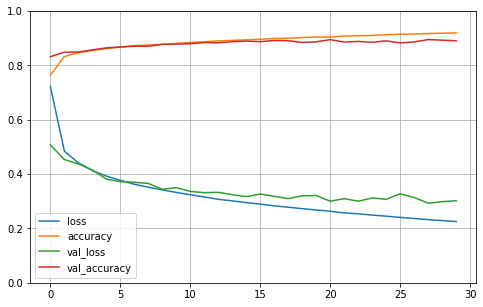

In [83]:
# Visualising the model training history

import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # setting limits for y-axis
plt.show()

Evaluating the Model Performance 

In [87]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 56us/sample - loss: 0.3352 - accuracy: 0.8803


[0.335216672539711, 0.8803]

In [88]:
# Predict and visualize the first 3 samples 
# from the test data.

y_pred = model.predict_classes(X_test[:3])
print(y_pred)
print([class_names[index] for index in y_pred])


[9 2 1]
['Ankle boot', 'Pullover', 'Trouser']


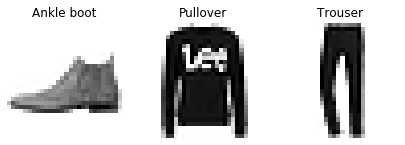

In [90]:
# Visualizing the predictions for the first 3 samples 
# from the test data

plt.figure(figsize=(7, 3))

for index, image in enumerate(X_test[:3]):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary")
    plt.axis('off')
    plt.title(class_names[y_pred[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()